<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# we get original df from trial 1, but we change it to trial 3 folder
orginal_df = pd.read_csv("../../data/raw/data-original.csv", encoding= 'unicode_escape')
data_descriptors = pd.read_csv("../../data/raw/data-descriptors.csv", encoding= 'unicode_escape')

In [41]:
orginal_df.shape,  data_descriptors.shape

((476, 20), (476, 225))

In [42]:
orginal_df.head(2)

,No,Compound,SMILES,CAS No,set,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,MVh,Texpi,Skin thicknessj,Skin Integrity testk,Skin Selection criteria,logkpl,logJmaxm,Reference
0,80,Urea,C(=O)(N)N,57-13-6,t,60.1,-2.11,406.0,-1.85,-3.96,4,3,36.7,312,0.1,transepidermal electrical resistance,20-130 Kohmcm2,-3.55,-5.41,(Peck et al. 1995)
1,81,Urea,C(=O)(N)N,57-13-6,t,60.1,-2.11,406.0,-2.02,-4.13,4,3,36.7,300,0.1,transepidermal electrical resistance,20-130 Kohmcm2,-3.69,-5.71,(Peck et al. 1995)


In [43]:
data_descriptors.head(2)

,SMILES,Texpi,ALogP,ALogp2,AMR,apol,nAcid,naAromAtom,nAromBond,nAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,0,8,...,60.05531,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
1,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,0,8,...,60.05531,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0


In [44]:
# starting from index 401 - 431 (432 exlcuded) removing water compounds
# index_to_drop = [i for i in range(401, 432)]

In [45]:
# let's make logkpl dataframe to use it for later
logkpl_df = orginal_df[['logkpl', 'Compound']]

In [46]:
# starting from index 445 - 476 (432 exlcuded) removing water compounds
index_to_drop = [i for i in range(445, 476)]

In [47]:
# remove the rows from our dataframes
clean_data_descriptors = data_descriptors.drop(index_to_drop, axis=0)
clean_data_descriptors.reset_index(inplace=True, drop=True)

logkpl_df = logkpl_df.drop(index_to_drop, axis=0)
logkpl_df.reset_index(inplace=True, drop=True)

In [48]:
logkpl_df.shape, clean_data_descriptors.shape

((445, 2), (445, 225))

In [49]:
for col in data_descriptors.columns:
    if data_descriptors[col].isna().sum() > 0:
        print(col, data_descriptors[col].isna().sum())
        #data_descriptors[col] = tries[col].fillna(tries[col].mean())

HybRatio 31
JPLogP 31
Kier3 12
topoShape 31
geomShape 476


remove `geomShape` & `SMILES` columns from data descsriptors, and fill the rest with mean for now.

In [50]:
clean_data_descriptors = clean_data_descriptors.drop(["geomShape"], axis=1)

In [51]:
clean_data_descriptors['topoShape'].describe()

count    445.000000
mean       0.847435
std        0.200462
min        0.000000
25%        0.750000
50%        1.000000
75%        1.000000
max        1.000000
Name: topoShape, dtype: float64

<Axes: ylabel='Kier3'>

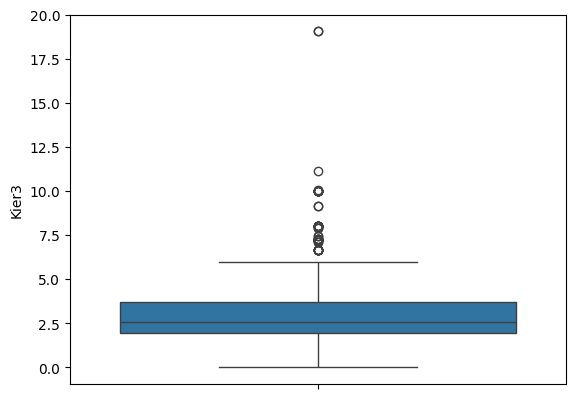

In [52]:
sns.boxplot(clean_data_descriptors['Kier3'])

In [53]:
mean_cols = ['topoShape']
median_cols = ['HybRatio', 'JPLogP', 'Kier3']

In [54]:
# filling by mean
for col in clean_data_descriptors.columns:
    if clean_data_descriptors[col].isna().sum() > 0:
        print(col, clean_data_descriptors[col].isna().sum())
        if col in mean_cols:
            clean_data_descriptors[col] = clean_data_descriptors[col].fillna(clean_data_descriptors[col].mean())
        if col in median_cols:
            clean_data_descriptors[col] = clean_data_descriptors[col].fillna(clean_data_descriptors[col].median())

Kier3 12


In [55]:
clean_data_descriptors.isna().sum().sum()

0

In [56]:
clean_data_descriptors.shape

(445, 224)

In [57]:
logkpl_df.shape

(445, 2)

In [58]:
trial_4_df = pd.concat([logkpl_df, clean_data_descriptors], axis=1)
trial_4_df.shape

(445, 226)

In [59]:
trial_4_df

,logkpl,Compound,SMILES,Texpi,ALogP,ALogp2,AMR,apol,nAcid,naAromAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-3.55,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
1,-3.69,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
2,-3.83,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
3,-3.95,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
4,-3.93,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-3.68,Methylglucose,COC(C(C=O)O)C(C(CO)O)O,310,-2.2754,5.177445,42.1719,26.467102,0,0,...,194.182751,24.142258,1.857097,14.920659,14.920659,0.000000,252.0,18.0,-2.806,54.0
441,-1.56,Eugenol,COC1=C(C=CC(=C1)CC=C)O,305,2.5541,6.523427,48.5026,27.205516,0,6,...,164.201458,23.427332,1.952278,5.304497,5.304497,0.000000,204.0,15.0,2.556,54.0
442,-1.59,Eugenol,COC1=C(C=CC(=C1)CC=C)O,305,2.5541,6.523427,48.5026,27.205516,0,6,...,164.201458,23.427332,1.952278,5.304497,5.304497,0.000000,204.0,15.0,2.556,54.0
443,-2.07,Methyl methanesulfonate,COS(=O)(=O)C,305,-0.3747,0.140400,21.6541,12.826758,0,0,...,110.133416,10.465990,1.744332,10.298097,7.194544,0.000000,28.0,3.0,-0.869,24.0


In [60]:
# saving trial 4 file
trial_4_df.to_csv('../../data/processed/trial4.csv', index=False)